In [1]:
import pandas as pd

In [2]:
fx = pd.read_csv('data_safe_copy.csv',parse_dates=['Date']).set_index('Date')

In [3]:
fx.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 280 entries, 2025-01-02 to 2026-01-30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  280 non-null    float64
 1   GBPUSD  280 non-null    float64
 2   PLNUSD  280 non-null    float64
 3   USDPLN  280 non-null    float64
 4   USDJPY  280 non-null    float64
 5   AUDUSD  280 non-null    float64
 6   NZDUSD  280 non-null    float64
 7   USDCAD  280 non-null    float64
 8   USDCHF  280 non-null    float64
 9   EURPLN  280 non-null    float64
 10  GBPPLN  280 non-null    float64
dtypes: float64(11)
memory usage: 26.2 KB


In [49]:
fx = fx.sort_index()
print(fx.index.is_monotonic_increasing)

True


In [5]:
print(fx.dtypes)

EURUSD    float64
GBPUSD    float64
PLNUSD    float64
USDPLN    float64
USDJPY    float64
AUDUSD    float64
NZDUSD    float64
USDCAD    float64
USDCHF    float64
EURPLN    float64
GBPPLN    float64
dtype: object


In [6]:
print(fx.index.dtype)

datetime64[us]


In [47]:
print(fx.head())

             EURUSD   GBPUSD    PLNUSD   USDPLN    USDJPY   AUDUSD   NZDUSD  \
Date                                                                          
2025-01-02  1.02661  1.23826  0.240270  4.16199  157.4610  0.62033  0.55966   
2025-01-03  1.03062  1.24267  0.241453  4.14160  157.3420  0.62176  0.56089   
2025-01-06  1.03900  1.25188  0.244290  4.09350  157.6200  0.62427  0.56402   
2025-01-07  1.03426  1.24771  0.242804  4.11855  158.0405  0.62326  0.56331   
2025-01-08  1.03185  1.23638  0.241377  4.14290  158.3085  0.62132  0.56058   

             USDCAD   USDCHF   EURPLN   GBPPLN  baseline_pred  
Date                                                           
2025-01-02  1.44067  0.91210  4.27274  5.15363            NaN  
2025-01-03  1.44467  0.90891  4.26841  5.14664        1.02661  
2025-01-06  1.43330  0.90478  4.25315  5.12457        1.03062  
2025-01-07  1.43683  0.90937  4.25965  5.13875        1.03900  
2025-01-08  1.43758  0.91101  4.27485  5.12220        1.03426 

In [48]:
print(fx.tail())

             EURUSD   GBPUSD    PLNUSD   USDPLN    USDJPY   AUDUSD   NZDUSD  \
Date                                                                          
2026-01-26  1.18777  1.36768  0.282362  3.54155  154.1550  0.69100  0.59697   
2026-01-27  1.20426  1.38461  0.286789  3.48689  152.3020  0.70092  0.60433   
2026-01-28  1.19562  1.38024  0.284316  3.51721  153.4235  0.70384  0.60594   
2026-01-29  1.19695  1.38095  0.284600  3.51370  153.0050  0.70497  0.60751   
2026-01-30  1.18534  1.36839  0.281465  3.55284  154.7785  0.69637  0.60212   

             USDCAD   USDCHF   EURPLN   GBPPLN  baseline_pred  
Date                                                           
2026-01-26  1.37115  0.77720  4.20655  4.84370        1.18213  
2026-01-27  1.35758  0.76114  4.19912  4.82798        1.18777  
2026-01-28  1.35621  0.76859  4.20524  4.85459        1.20426  
2026-01-29  1.34872  0.76476  4.20572  4.85224        1.19562  
2026-01-30  1.36162  0.77302  4.21132  4.86167        1.19695 

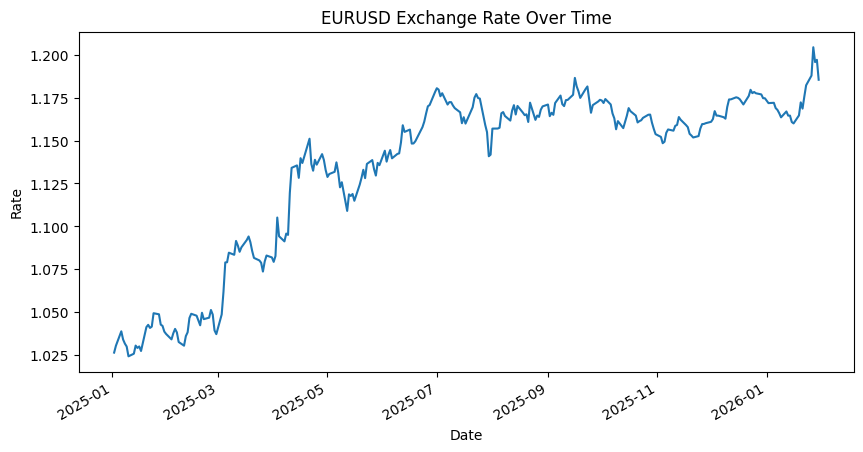

In [9]:
p1 = fx['EURUSD']
p2 = fx['USDJPY']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
p1.plot()
plt.title('EURUSD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()


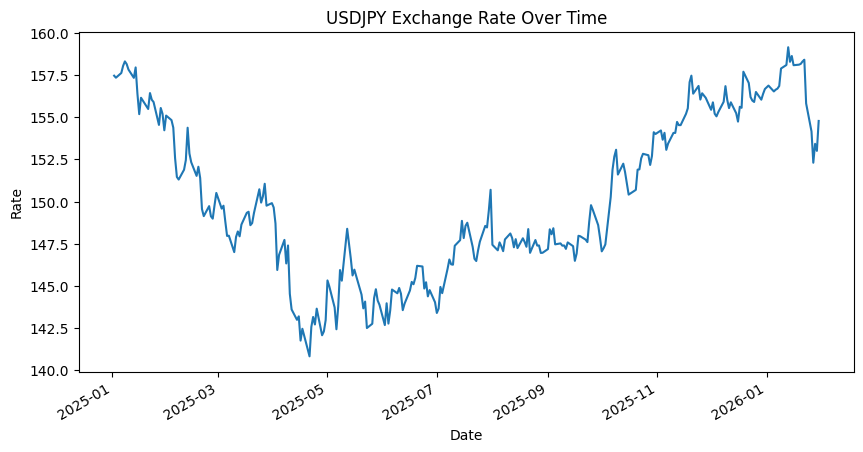

In [10]:
plt.figure(figsize=(10,5))
p2.plot()
plt.title('USDJPY Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()

<Figure size 1000x500 with 0 Axes>

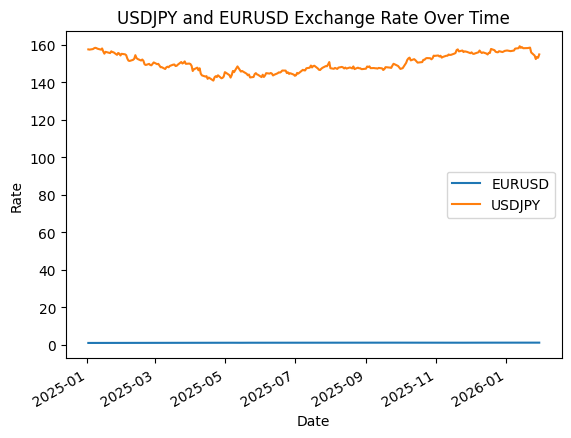

In [11]:
plt.figure(figsize=(10,5))
fx[['EURUSD','USDJPY']].plot()
plt.title('USDJPY and EURUSD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()

In [37]:
rolling_window = 7
rolling_mean_eurusd = fx['EURUSD'].rolling(window=rolling_window).mean()
rolling_std_eurusd = fx['EURUSD'].rolling(window=rolling_window).std()
rolling_mean_usdjpy = fx['USDJPY'].rolling(window=rolling_window).mean()
rolling_std_usdjpy = fx['USDJPY'].rolling(window=rolling_window).std()

In [46]:
print("EURUSD Rolling Mean:")
print(rolling_mean_eurusd[:10])
print("\nEURUSD Rolling Std:")
print(rolling_std_eurusd[:10])

print("\n======================================\n")

print("USDJPY Rolling Mean:")
print(rolling_mean_usdjpy[:10])
print("\nUSDJPY Rolling Std:")
print(rolling_std_usdjpy[:10])


EURUSD Rolling Mean:
Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08         NaN
2025-01-09         NaN
2025-01-10    1.030991
2025-01-13    1.030900
2025-01-14    1.030911
2025-01-15    1.029531
Name: EURUSD, dtype: float64

EURUSD Rolling Std:
Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08         NaN
2025-01-09         NaN
2025-01-10    0.004803
2025-01-13    0.004905
2025-01-14    0.004904
2025-01-15    0.003367
Name: EURUSD, dtype: float64


USDJPY Rolling Mean:
Date
2025-01-02           NaN
2025-01-03           NaN
2025-01-06           NaN
2025-01-07           NaN
2025-01-08           NaN
2025-01-09           NaN
2025-01-10    157.820571
2025-01-13    157.802286
2025-01-14    157.889214
2025-01-15    157.712929
Name: USDJPY, dtype: float64

USDJPY Rolling Std:
Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-

In [39]:
rolling_features = pd.DataFrame({
    'rolling_mean_eurusd': rolling_mean_eurusd,
    'rolling_std_eurusd' : rolling_std_eurusd,
    'rolling_mean_usdjpy': rolling_mean_usdjpy,
    'rolling_std_usdjpy': rolling_std_usdjpy
})
rolling_features.head(10)

,rolling_mean_eurusd,rolling_std_eurusd,rolling_mean_usdjpy,rolling_std_usdjpy
Date,,,,
2025-01-02,NaN,NaN,NaN,NaN
2025-01-03,NaN,NaN,NaN,NaN
2025-01-06,NaN,NaN,NaN,NaN
2025-01-07,NaN,NaN,NaN,NaN
2025-01-08,NaN,NaN,NaN,NaN
2025-01-09,NaN,NaN,NaN,NaN
2025-01-10,1.030991,0.004803,157.820571,0.363367
2025-01-13,1.030900,0.004905,157.802286,0.386934
2025-01-14,1.030911,0.004904,157.889214,0.330534


In [40]:
fx['baseline_pred'] = fx['EURUSD'].shift(1)
absolute_error = (fx['EURUSD'] - fx['baseline_pred']).abs()
absolute_mean = absolute_error.mean()
print("Mean Absolute Error:", absolute_mean)

Mean Absolute Error: 0.004069426523297489


In [41]:
non_missing_predictions = fx['baseline_pred'].notna().sum()
print("Validation passed:", non_missing_predictions == len(fx)-1)

Validation passed: True


In [45]:

report = {
    "currency_pairs": ["EURUSD", "USDJPY"],
    "rolling_window": rolling_window,
    "absolute": absolute_mean,
    "date_range": fx.index.max() - fx.index.min()
}

print("\nSummary Report:")
for key, value in report.items():
    print(f"{key}: {value}")

assert report["rolling_window"] == rolling_window, "Rolling window mismatch!"


Summary Report:
currency_pairs: ['EURUSD', 'USDJPY']
rolling_window: 7
absolute: 0.004069426523297489
date_range: 393 days 00:00:00
